# 필요한 모듈 import하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 준비

In [2]:
wine = load_wine()
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


# 데이터 이해하기

In [3]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [4]:
print(wine.feature_names)
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


In [5]:
wine_label = wine.target
print(wine_label.shape)

(178,)


In [6]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [7]:
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


# 다양한 모델로 학습시켜보기

In [9]:
from sklearn.metrics import confusion_matrix      #모델 평가용
from sklearn.metrics import roc_curve

## 1. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
   
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### Decision Tree 분석

[[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]
------------------------------


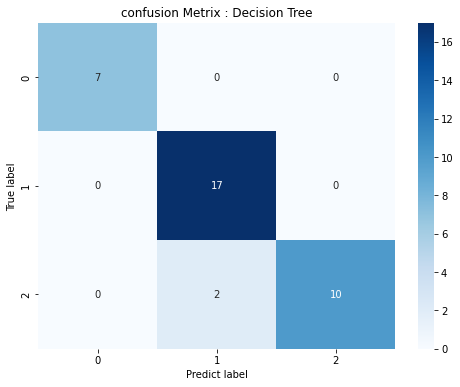

In [11]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d')
plt.title("confusion Metrix : Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Random Forest 분석

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
------------------------------


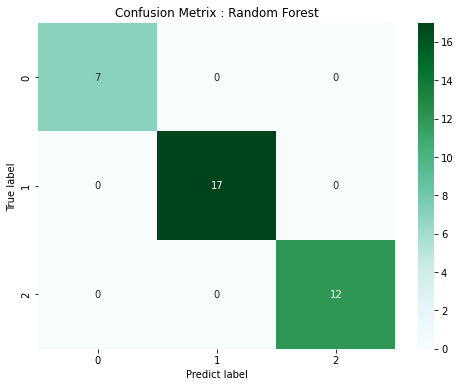

In [13]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="BuGn", annot=True, fmt='d')
plt.title("Confusion Metrix : Random Forest")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 3. SVM

In [14]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



### SVM 분석

[[ 6  0  1]
 [ 1 15  1]
 [ 0 11  1]]
------------------------------


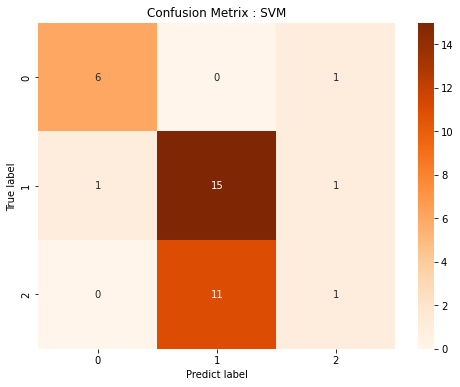

In [15]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Oranges", annot=True, fmt='d')
plt.title("Confusion Metrix : SVM")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 4. SGD Classifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54         7
           1       0.71      0.71      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.53        36
   macro avg       0.36      0.57      0.41        36
weighted avg       0.40      0.53      0.44        36



### SGD Classifier 분석

[[ 7  0  0]
 [ 5 12  0]
 [ 7  5  0]]
------------------------------


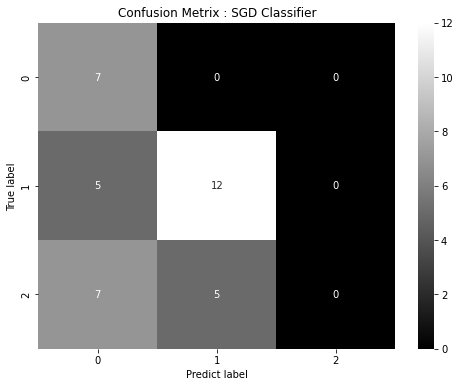

In [17]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="gray", annot=True, fmt='d')
plt.title("Confusion Metrix : SGD Classifier")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

### 5. Logistic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression

logist_model = LogisticRegression(max_iter=500,      
                                 solver='liblinear')
logist_model.fit(X_train, y_train)
y_pred = logist_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



### Logistic Regression 분석

[[ 7  0  0]
 [ 1 16  0]
 [ 0  0 12]]
------------------------------


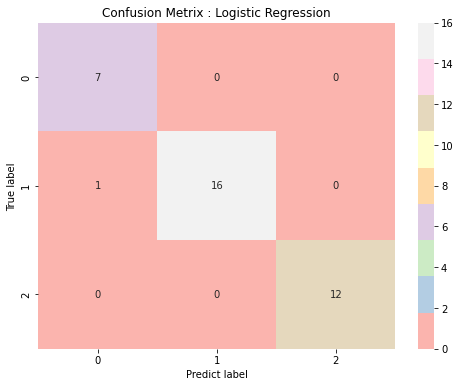

In [19]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*30)
sns.heatmap(cm, cmap="Pastel1", annot=True, fmt='d')
plt.title("Confusion Metrix : Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predict label")
plt.show()

# 모델 평가 결론

와인을 분류하는 것은 모델이 얼마나 정밀하게 라벨을 나누었는지가 중요하다. 그래서 precision 값이 중요하다.

1. **Decision Tree  :** 개수가 적은 0번 라벨은 잘 맞추었으나 1번 라벨의 경우 recall값이 predict값보다 큰 것을 보아, 1번 라벨이 아닌 것도 일부 포함되어 있다는 것을 알 수 있었고 반대로 2번 라벨의 경우 predict 값이 recall보다 높아서 2번 라벨에 해당하는 와인을 확실하게 분류했지만 임계점이 높아서 2번 라벨에 해당하는 와인 중 일부는 분류하지 못했다.


2. **Random Forest :** 와인 데이터 양이 적기 때문에 분류를 잘한 것 같다. 모든 모델 중 가장 뛰어난 성능을 보였다. 와인을 분류하는 모델로 가장 적합하다.


3. **SVM :** 정확도가 위에 두 모델보다 낮고 2번 라벨의 f1-score 값을 보아 모델의 분류능력이 많이 떨어지는 것을 확인할 수 있었다. 와인분류 모델로 부적합하다.


4. **SGD Classifier :** 2번 라벨을 하나도 맞추지 못했고 결과값이 음수가 나오기 때문에 zero_division=0를 사용해서 결과값을 자연수로 바꿔주면 오류가 발생하지 않는다는 것을 알았다. 상대적으로 개수가 적은 0번 라벨도 제대로 구분하지 못하는 것을 보아 와인 분류모델로 적합하지 않다.

5. **Logistic Regression :** 0번 라벨의 f1-score 값이 0.93으로 1번과 2번에 비해 조금 낮게 측정되었지만 0번에 해당하는 개수가 적고 전체적인 f1-score값이 높으므로 Random Forest 모델을 대체할만 하다. 